In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader,random_split,WeightedRandomSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

In [2]:
plotdata=datasets.ImageFolder(root=r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage")
classname=plotdata.classes
plt.style.use("seaborn-v0_8-muted")
plt.figure(figsize=(20,10))
rows,cols=3,3
for i in range(1,rows*cols+1):
    plt.subplot(rows,cols,i)
    randomid=torch.randint(0,len(plotdata),size=[1]).item()
    img,label=plotdata[randomid]
    plt.imshow(img)
    plt.title(f"Disease name: {classname[label]}")
    plt.axis(False)
plt.suptitle("Sample Disease Classifications from Train Dataset", fontsize=16, fontweight='bold', color='navy')
plt.tight_layout()
plt.show()

FileNotFoundError: Found no valid file for the classes Apple___Apple_scab, Apple___Cedar_apple_rust, Apple___healthy, Blueberry___healthy, Corn_(maize)___Northern_Leaf_Blight, Grape___Black_rot, Grape___Esca_(Black_Measles), Raspberry___healthy, Tomato__Tomato_YellowLeaf__Curl_Virus, Tomato___Early_blight, Tomato___Septoria_leaf_spot, Tomato___Tomato_Yellow_Leaf_Curl_Virus. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.5058825].


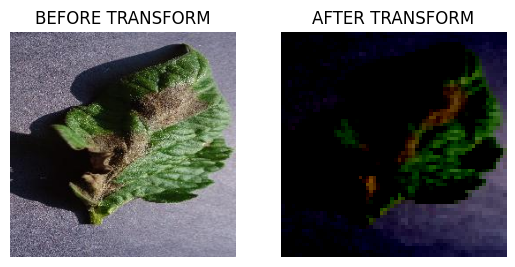

In [ ]:
from pathlib import Path
from PIL import Image
import random
imagepath=Path(r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage")
def plot_original_transform(imagpath,transform):
    randomimglist=random.choice(list(imagepath.rglob('*.jpg')))
    image=Image.open(randomimglist).convert("RGB")
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("BEFORE TRANSFORM")
    plt.axis(False)
    transform_img=transform(image)
    plt.subplot(1,2,2)
    plt.imshow(transform_img.permute(1,2,0))
    plt.title("AFTER TRANSFORM")
    plt.axis(False)
plot_original_transform(imagepath,transform)

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
def check_imbalance_class(data):
    labels=[sample[1] for sample in data]
    class_count=Counter(labels)
    
    class_names = data.classes

    for i, counts in class_count.items():
     print(f"{class_names[i]}: {counts}")
     
    counts=np.array(list(class_count.values()))
    imbalance_ratio=counts.max()/counts.min()
    print(f"CLASS IMBALANCE RATION : {imbalance_ratio:.2f}")


     
    plt.figure(figsize=(20, 5))
    plt.bar([class_names[i] for i in class_count.keys()], class_count.values())
    plt.xticks(rotation=60, ha='right', fontsize=6)  # rotated + smaller font
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

CLASS IMBALANCE RATION : 21.11
Pepper__bell___Bacterial_spot: 997
Pepper__bell___healthy: 1478
Potato___Early_blight: 1000
Potato___Late_blight: 1000
Potato___healthy: 152
Tomato_Bacterial_spot: 2127
Tomato_Early_blight: 1000
Tomato_Late_blight: 1909
Tomato_Leaf_Mold: 952
Tomato_Septoria_leaf_spot: 1771
Tomato_Spider_mites_Two_spotted_spider_mite: 1676
Tomato__Target_Spot: 1404
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208
Tomato__Tomato_mosaic_virus: 373
Tomato_healthy: 1591


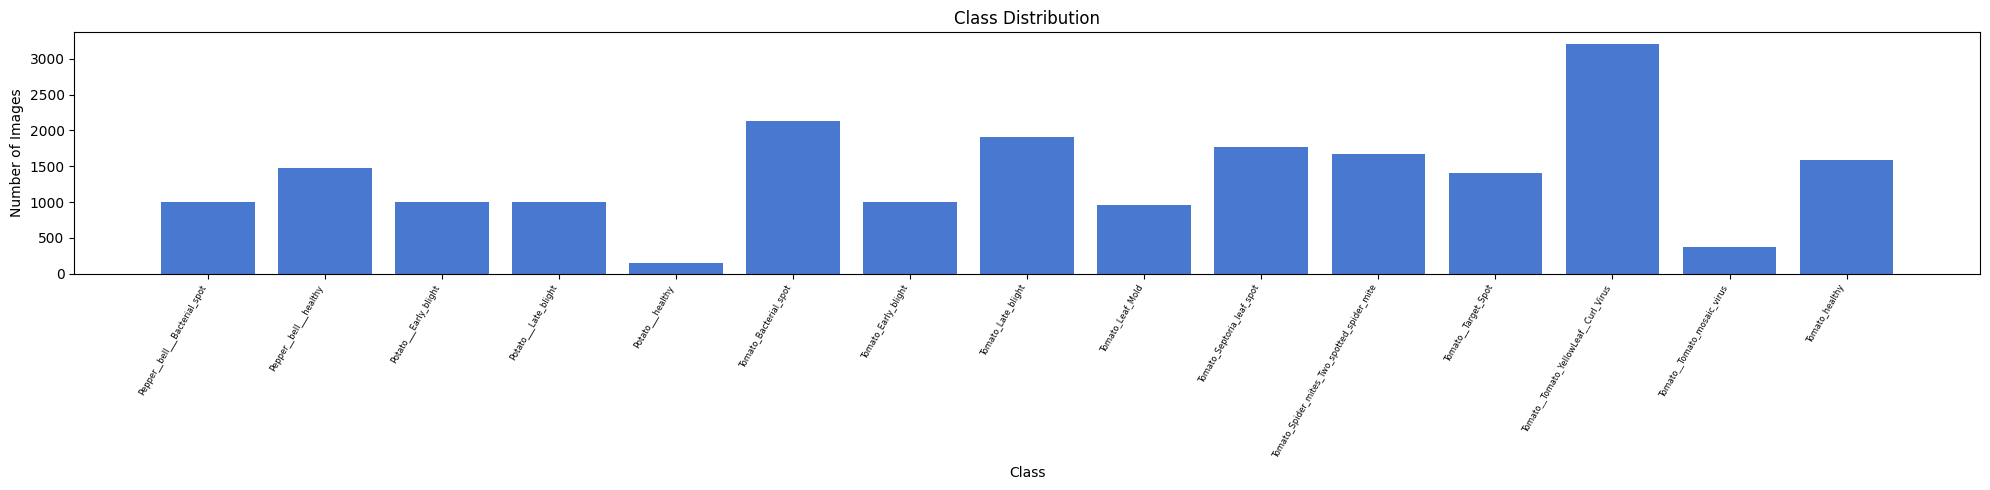

In [33]:
check_imbalance_class(data)

In [41]:
def get_loader(root_directory,batch_size):
    data_transform=transform=v2.Compose([
    v2.Resize((64,64)),
    v2.ToImage(),
    v2.RandomHorizontalFlip(p=0.3),
    v2.ToDtype(torch.float32,scale=True),
    v2.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
    ])
    
    dataset=datasets.ImageFolder(root=root_directory,transform=data_transform)
    class_weight=[]
    for root,subdir ,files in os.walk(root_directory):
        if len(files)>0:
            class_weight.append(1/len(files))
    sample_weights= [0]*len(dataset)
    for idx,(data,label) in enumerate(dataset):
        sample_weights[idx]=class_weight[label]
    sampler=WeightedRandomSampler(sample_weights,num_samples=len(sample_weights),replacement=True)
    loader=DataLoader(dataset,batch_size=batch_size,sampler=sampler)
    return loader

In [ ]:
def getloader(root_directory, batch_size, train_ratio=0.8, image_size=300):
    # Transform (ImageNet normalization for pretrained models like EfficientNet)
    data_transform = v2.Compose([
        v2.Resize((image_size, image_size)),
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.3),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # Load dataset
    full_dataset = datasets.ImageFolder(root=root_directory, transform=data_transform)

    # Train-test split
    train_size = int(train_ratio * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

    # Calculate class weights for sampler (to handle class imbalance)
    train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]
    class_counts = Counter(train_labels)
    class_weights = {label: 1.0 / count for label, count in class_counts.items()}
    sample_weights = [class_weights[label] for label in train_labels]
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    # Loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    return train_loader, test_loader

In [7]:
root=r"C:\Users\Avijit\Desktop\AgriAssure\PLANTCURE\DATASET\PlantVillage"
trainloader,testloader=get_train_test_loaders(root,32,0.8)

In [ ]:
len(trainloader)*32+len(testloader)*32,

20640

In [46]:
train_feature_batch,train_label=next(iter(trainloader))
test_feature_batch,test_label=next(iter(testloader))

In [47]:
train_feature_batch.shape

torch.Size([32, 3, 64, 64])

In [ ]:
class CNN1(nn.Module):
    def __init__(self, input, hidden_units, output):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(input, hidden_units, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units * 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.Conv2d(hidden_units * 2, hidden_units * 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(hidden_units*2, hidden_units * 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.Conv2d(hidden_units * 2, hidden_units * 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        with torch.inference_mode():
            dummy = torch.randn(1, input, 64, 64)
            x = self.conv_block1(dummy)
            x = self.conv_block2(x)
            x= self.conv_block3(x)
            x = nn.Flatten()(x)
            num_features = x.shape[1]

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, output)  # No ReLU here
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x= self.conv_block3(x)
        return self.classifier(x)


In [60]:
from torchinfo import summary
device='cuda' if torch.cuda.is_available() else 'cpu'
model=CNN1(input=3,hidden_units=128,output=len(data.classes)).to(device)

RuntimeError: Given groups=1, weight of size [256, 128, 3, 3], expected input[1, 256, 16, 16] to have 128 channels, but got 256 channels instead

In [58]:
summary(model,input_size=(32,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
CNN1                                     [32, 15]                  --
├─Sequential: 1-1                        [32, 128, 32, 32]         --
│    └─Conv2d: 2-1                       [32, 128, 64, 64]         3,584
│    └─BatchNorm2d: 2-2                  [32, 128, 64, 64]         256
│    └─ReLU: 2-3                         [32, 128, 64, 64]         --
│    └─Conv2d: 2-4                       [32, 128, 64, 64]         147,584
│    └─BatchNorm2d: 2-5                  [32, 128, 64, 64]         256
│    └─ReLU: 2-6                         [32, 128, 64, 64]         --
│    └─MaxPool2d: 2-7                    [32, 128, 32, 32]         --
├─Sequential: 1-2                        [32, 256, 16, 16]         --
│    └─Conv2d: 2-8                       [32, 256, 32, 32]         295,168
│    └─BatchNorm2d: 2-9                  [32, 256, 32, 32]         512
│    └─ReLU: 2-10                        [32, 256, 32, 32]         --

In [61]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)

In [62]:
def train(model, dataloader, lossfn, optimizer, device):
    model.train()
    trainloss, trainacc = 0, 0

    for batch, (x, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Training', leave=False):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = lossfn(pred, y)
        trainloss += loss.item()

        prob = torch.argmax(pred, dim=1)
        trainacc += accuracy_score(y.detach().cpu().numpy(), prob.detach().cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            tqdm.write(f"🟩 Looked at {batch * len(x)}/{len(dataloader.dataset)} | Loss: {loss.item():.4f}")

    trainloss /= len(dataloader)
    trainacc /= len(dataloader)
    print(f"\n✅ TRAINING COMPLETE — Loss: {trainloss:.4f} | Accuracy: {trainacc:.4f}")
    return trainloss, trainacc

def test(model, dataloader, lossfn, device):
    model.eval()
    testloss, testacc = 0, 0

    with torch.inference_mode():
        for batch, (x, y) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Testing', leave=False):
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = lossfn(pred, y)
            testloss += loss.item()

            prob = torch.argmax(pred, dim=1)
            testacc += accuracy_score(y.detach().cpu().numpy(), prob.detach().cpu().numpy())

            if batch % 400 == 0:
                tqdm.write(f"🟦 Looked at {batch * len(x)}/{len(dataloader.dataset)} | Loss: {loss.item():.4f}")

    testloss /= len(dataloader)
    testacc /= len(dataloader)
    print(f"\n🔎 TESTING COMPLETE — Loss: {testloss:.4f} | Accuracy: {testacc:.4f}")
    return testloss, testacc

In [135]:
from tqdm.auto import tqdm
epochs=3
train_loss,train_acc,test_loss,test_acc=[],[],[],[]
for epoch in tqdm(range(epochs),desc='Training',ncols=150):
    print(f"Epoch--> [{epoch+1}]")
    trainloss,trainacc=train(model,trainloader,loss,optimizer,device)
    train_loss.append(trainloss)
    train_acc.append(trainacc)
    testloss,testacc=test(model,testloader,loss,device)
    test_loss.append(testloss)
    test_acc.append(testacc)


Training:   0%|                                                                                               …

Epoch--> [1]


Training:   0%|          | 0/516 [00:00<?, ?it/s]

🟩 Looked at 0/16510 | Loss: 0.2020
🟩 Looked at 12800/16510 | Loss: 0.0914

✅ TRAINING COMPLETE — Loss: 0.1737 | Accuracy: 0.9421


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

🟦 Looked at 0/4128 | Loss: 0.0912

🔎 TESTING COMPLETE — Loss: 0.1903 | Accuracy: 0.9477
Epoch--> [2]


Training:   0%|          | 0/516 [00:00<?, ?it/s]

🟩 Looked at 0/16510 | Loss: 0.1138
🟩 Looked at 12800/16510 | Loss: 0.4120

✅ TRAINING COMPLETE — Loss: 0.1665 | Accuracy: 0.9475


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

🟦 Looked at 0/4128 | Loss: 0.1575

🔎 TESTING COMPLETE — Loss: 0.2030 | Accuracy: 0.9438
Epoch--> [3]


Training:   0%|          | 0/516 [00:00<?, ?it/s]

🟩 Looked at 0/16510 | Loss: 0.1299
🟩 Looked at 12800/16510 | Loss: 0.0752

✅ TRAINING COMPLETE — Loss: 0.1515 | Accuracy: 0.9518


Testing:   0%|          | 0/129 [00:00<?, ?it/s]

🟦 Looked at 0/4128 | Loss: 0.3837

🔎 TESTING COMPLETE — Loss: 0.1963 | Accuracy: 0.9433


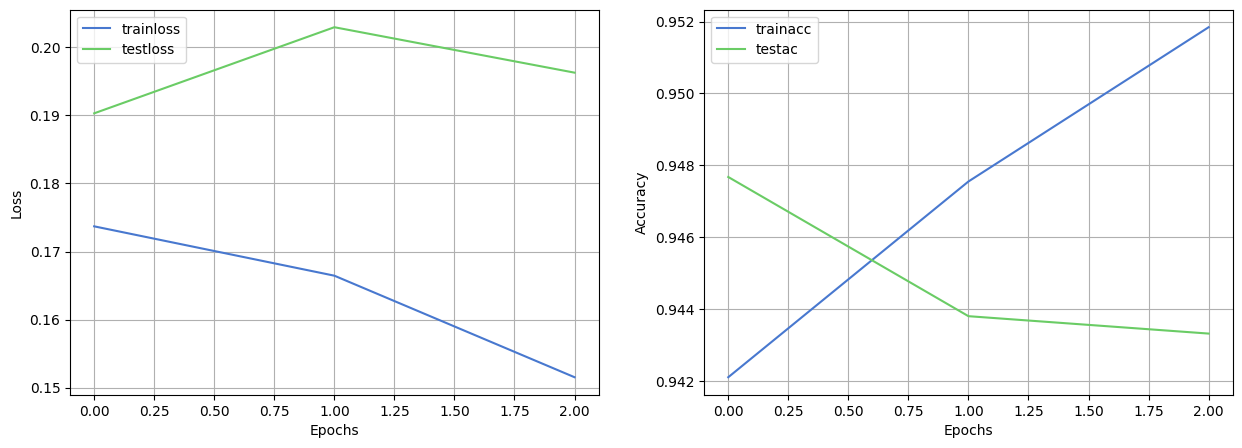

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_loss,)
plt.plot(test_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['trainloss','testloss'])
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(train_acc,)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['trainacc','testac'])
plt.grid(True)
plt.show()

In [137]:
y_pred,y_true=[],[]
model.eval()
with torch.inference_mode():
    for (xsam,ysam) in (testloader):
        xsam,ysam=xsam.to(device),ysam.to(device)
        testpred=model(xsam)
        testpred=torch.softmax(testpred,dim=1)
        testprob=torch.argmax(testpred,dim=1)
        y_pred.extend(testprob.detach().cpu().numpy())
        y_true.extend(ysam.detach().cpu().numpy())

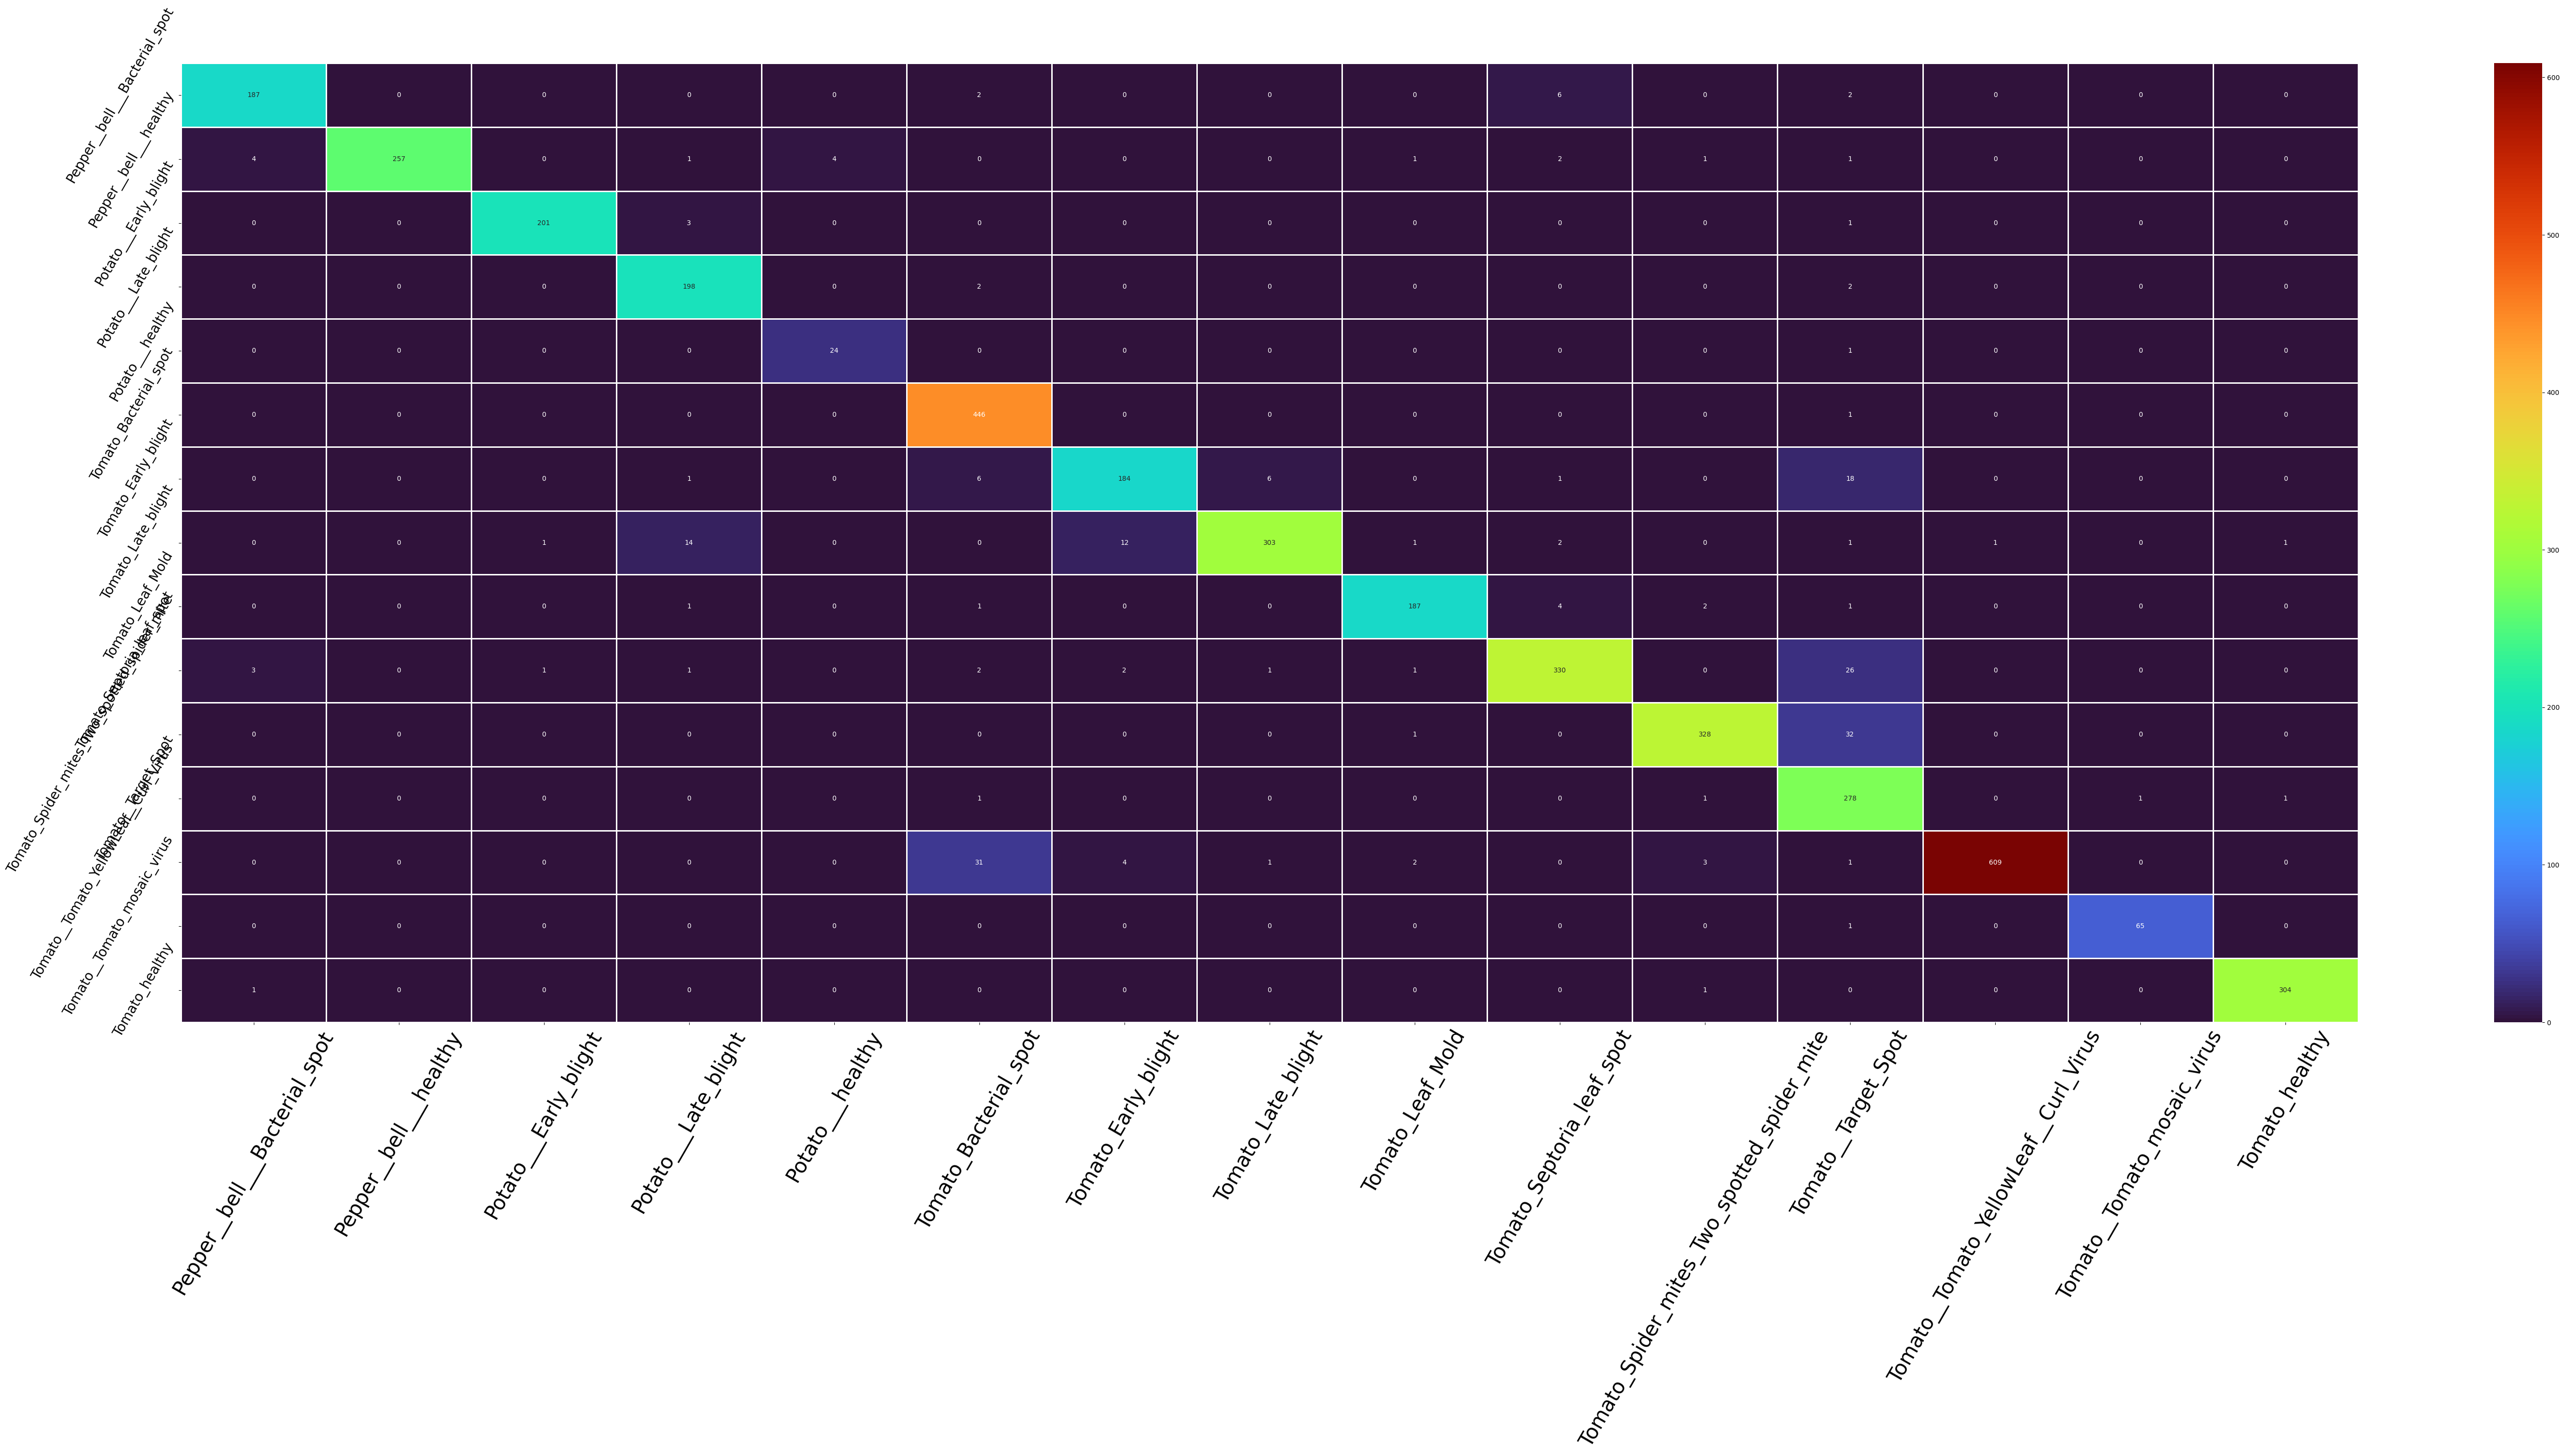

In [138]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(60,30))
sns.heatmap(cm,fmt='d',annot=True,cmap=plt.cm.turbo,xticklabels=data.classes,yticklabels=data.classes,linecolor='white',linewidths=1.0)
plt.xticks(fontsize=30,rotation=60)
plt.yticks(fontsize=20,rotation=60)
plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

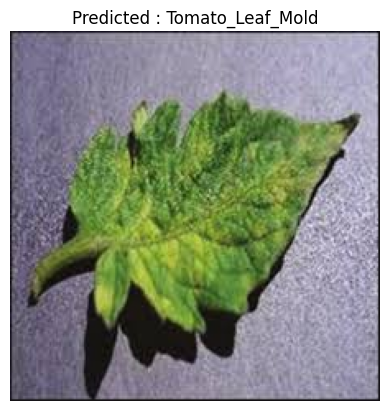

In [144]:
from PIL import Image

img=Image.open(r"C:\Users\Avijit\Desktop\AgriAssure\TESTIMAGE\tomato_leaf_mold2.jpeg").convert("RGB")
transform=transform=v2.Compose([
    v2.Resize((64,64)),
    v2.ToImage(),
    v2.RandomHorizontalFlip(p=0.3),
    v2.ToDtype(torch.float32,scale=True),
    v2.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
    ])
transform_img=transform(img).unsqueeze(0).to(device)
with torch.inference_mode():
    logit=model(transform_img)
    pred=torch.softmax(logit,dim=1)
    prob=torch.argmax(pred,dim=1)
class_name=data.classes
plt.imshow(img)
plt.title(f"Predicted : {class_name[prob]}")
plt.axis(False)